In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# metrics
from keras.metrics import categorical_crossentropy
# optimization method
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
from google.colab import drive
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.metrics import categorical_crossentropy
from keras.datasets import mnist
from PIL import Image, ImageOps
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300


drive.mount('/content/drive')
labels = os.listdir("/content/drive/MyDrive/HCR Project/Labels")
labels
direc = "/content/drive/MyDrive/HCR Project/Labels"
X=[]
Y=[]
for label in labels:
    path_link = os.path.join(direc, label)

    print(label)

    for image in os.listdir(path_link):
            img1 = Image.open(os.path.join(path_link, image))
            imgbin = ImageOps.invert(img1)
            ret11,th = cv2.threshold(np.array(img1),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgbw = img1.point(lambda p:p > ret11 and 255)
            kernal = np.ones((5,5),np.uint8)
            erosion = cv2.dilate(np.array(imgbw),kernal,iterations = 2)
            erosion = cv2.bitwise_not(erosion)
            erosion = np.array(erosion)
            erosion = cv2.resize(erosion, (28,28))
            X.append(erosion)
            Y.append(label)


label_bin = LabelBinarizer()
Y = label_bin.fit_transform(Y)
Y = np.array(Y)
X = np.array(X)
print(X.shape)
print(Y.shape)
for i in range(4):
  cv2_imshow(X[i])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1
2
3
4
5
6
7
8
9
0
(441, 28, 28)
(441, 10)


In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.4)
X_test1 , X_test2, Y_test1, Y_test2 = train_test_split( X_test, Y_test, random_state=42, test_size=0.5)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape)
print(y_train.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test1.shape)
print(Y_test1.shape)
print(X_test2.shape)
print(Y_test2.shape)

cv2_imshow(x_train[0])
cv2_imshow(X_train[0])
x_train = np.append(x_train,X_train, axis = 0)
y_train = np.append(y_train,Y_train, axis = 0)
X_test1 = np.append(x_test,X_test1, axis = 0)
Y_test1 = np.append(y_test,Y_test1, axis = 0)
print(x_train.shape)
print(y_train.shape)
print(X_test1.shape)
print(Y_test1.shape)

(60000, 28, 28)
(60000, 10)
(264, 28, 28)
(264, 10)
(88, 28, 28)
(88, 10)
(89, 28, 28)
(89, 10)


(60264, 28, 28)
(60264, 10)
(10088, 28, 28)
(10088, 10)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 30)       120       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 batch_normalization_5 (Batc  (None, 10, 10, 15)       60        
 hNormalization)                                                 
                                                      

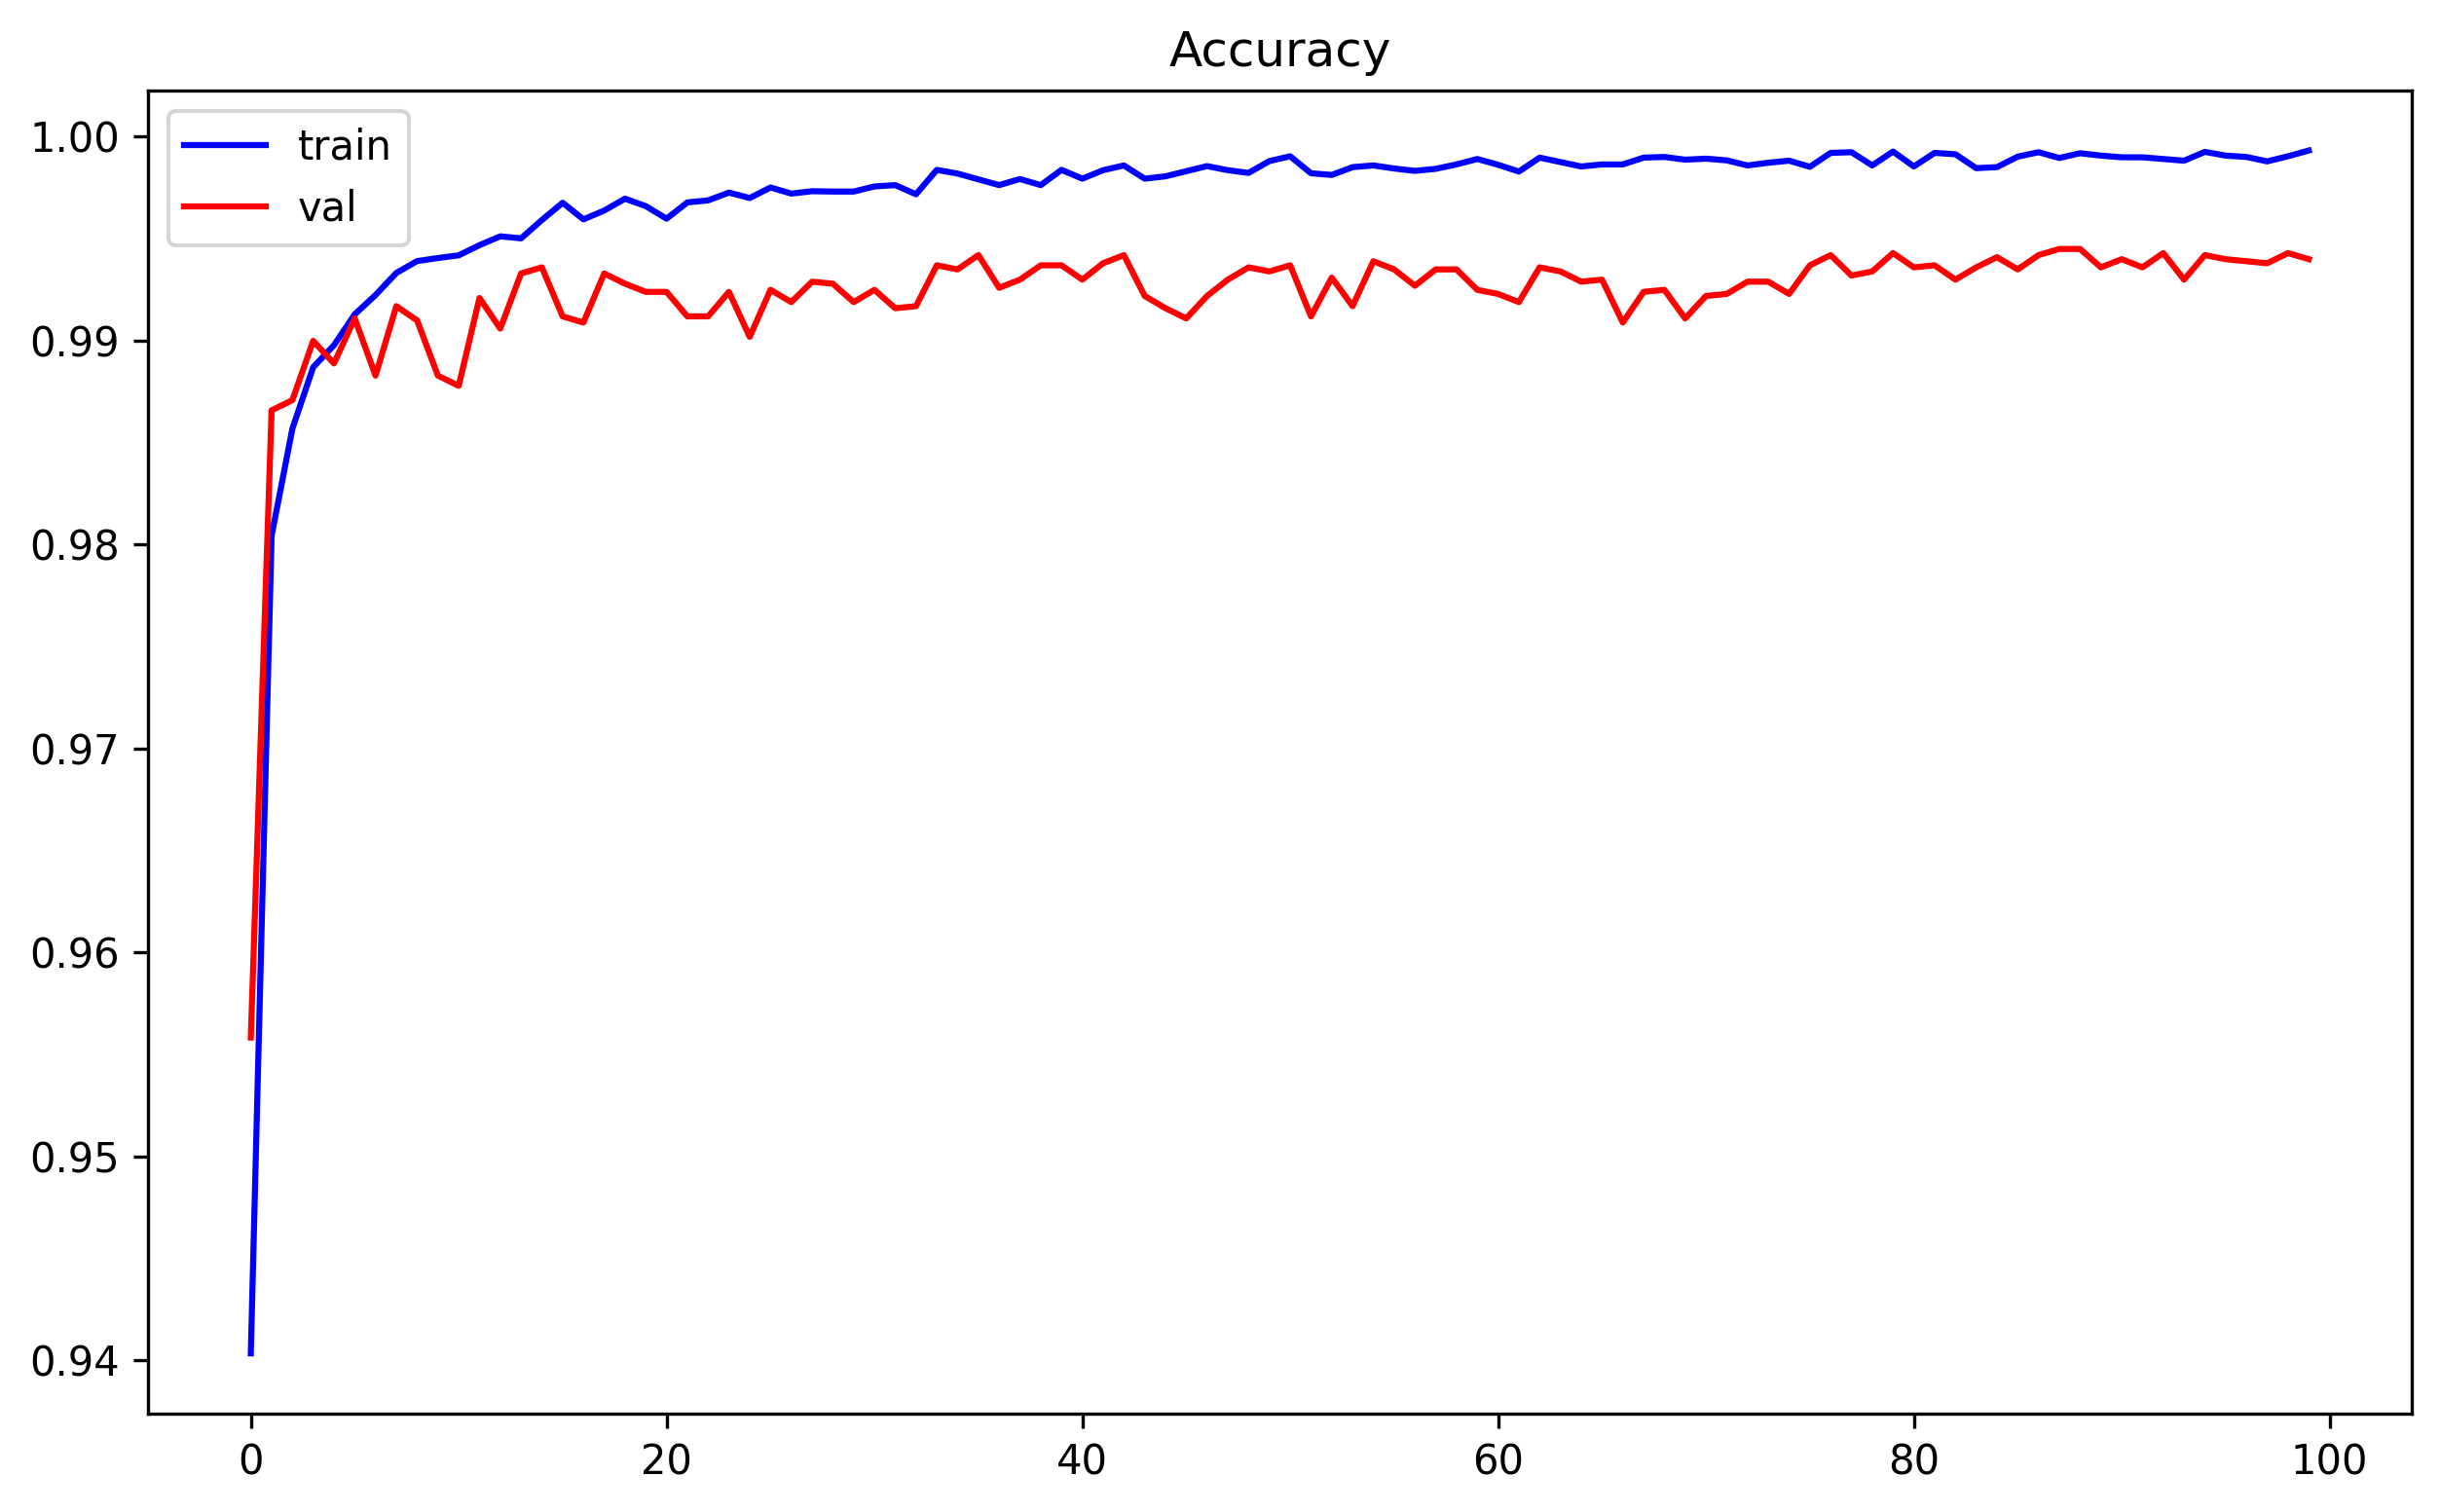

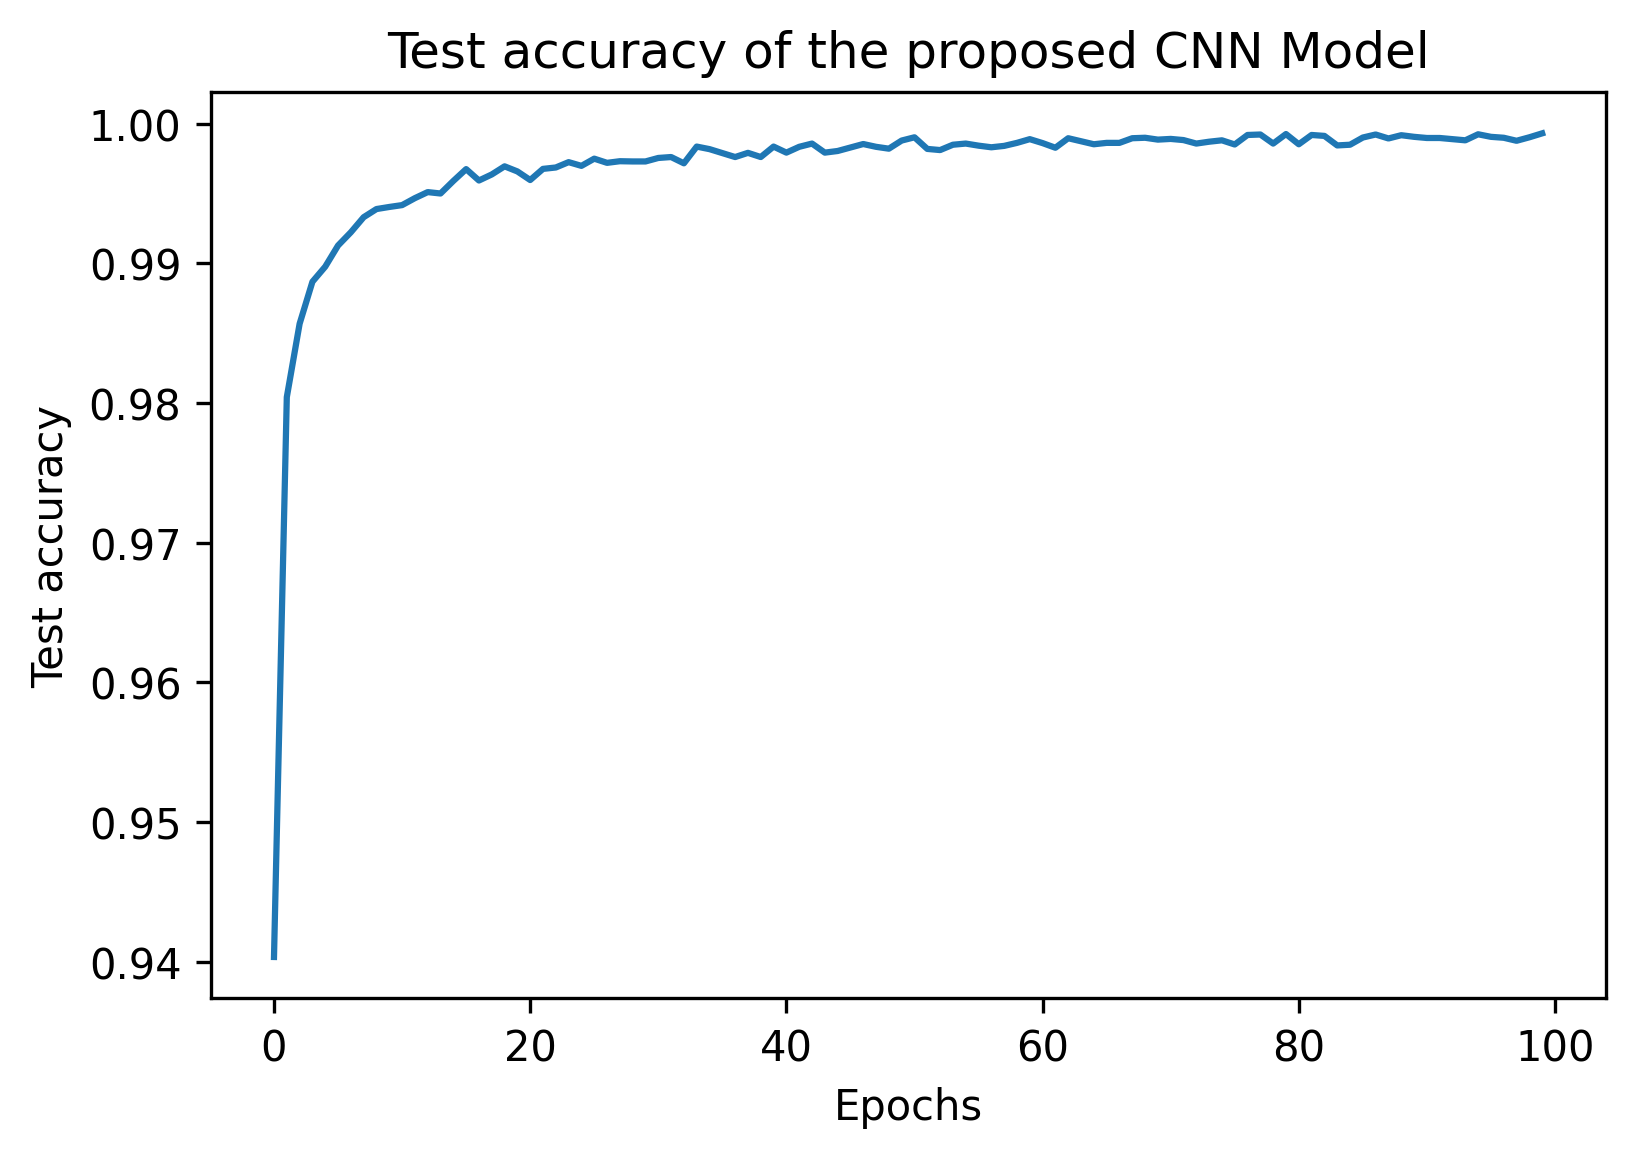

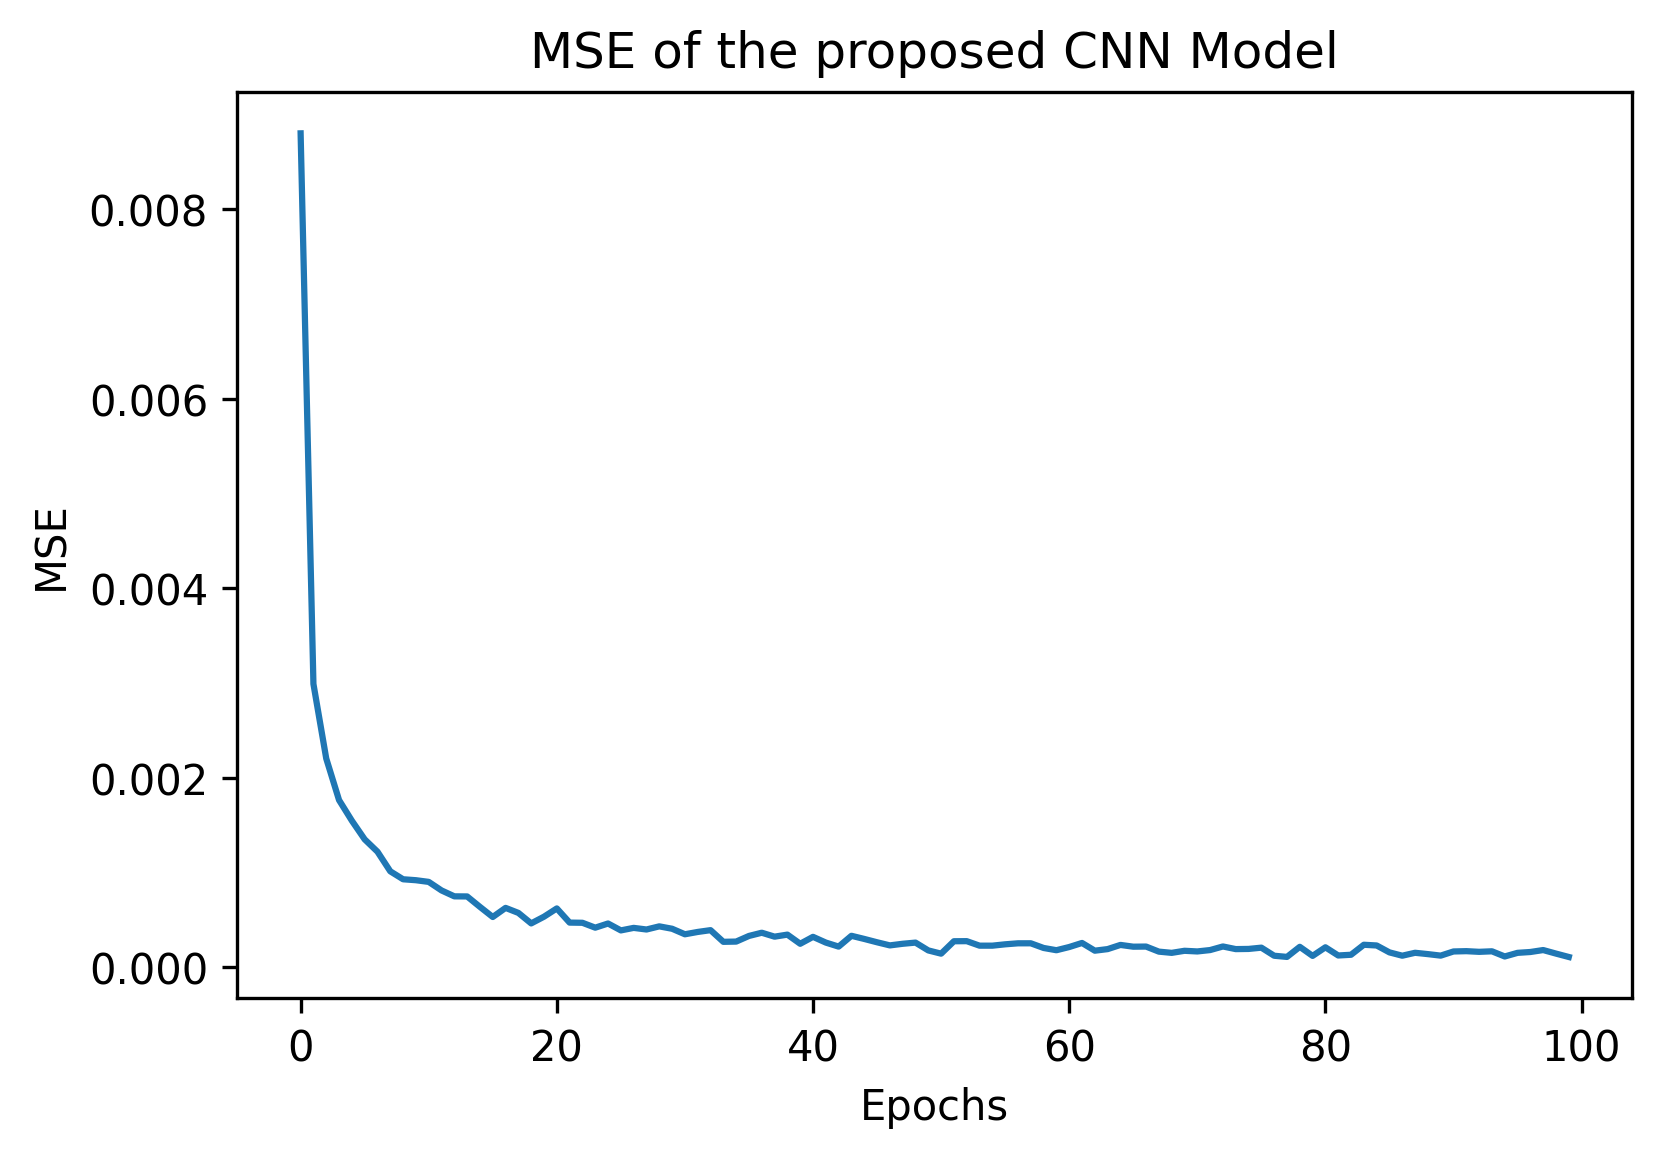

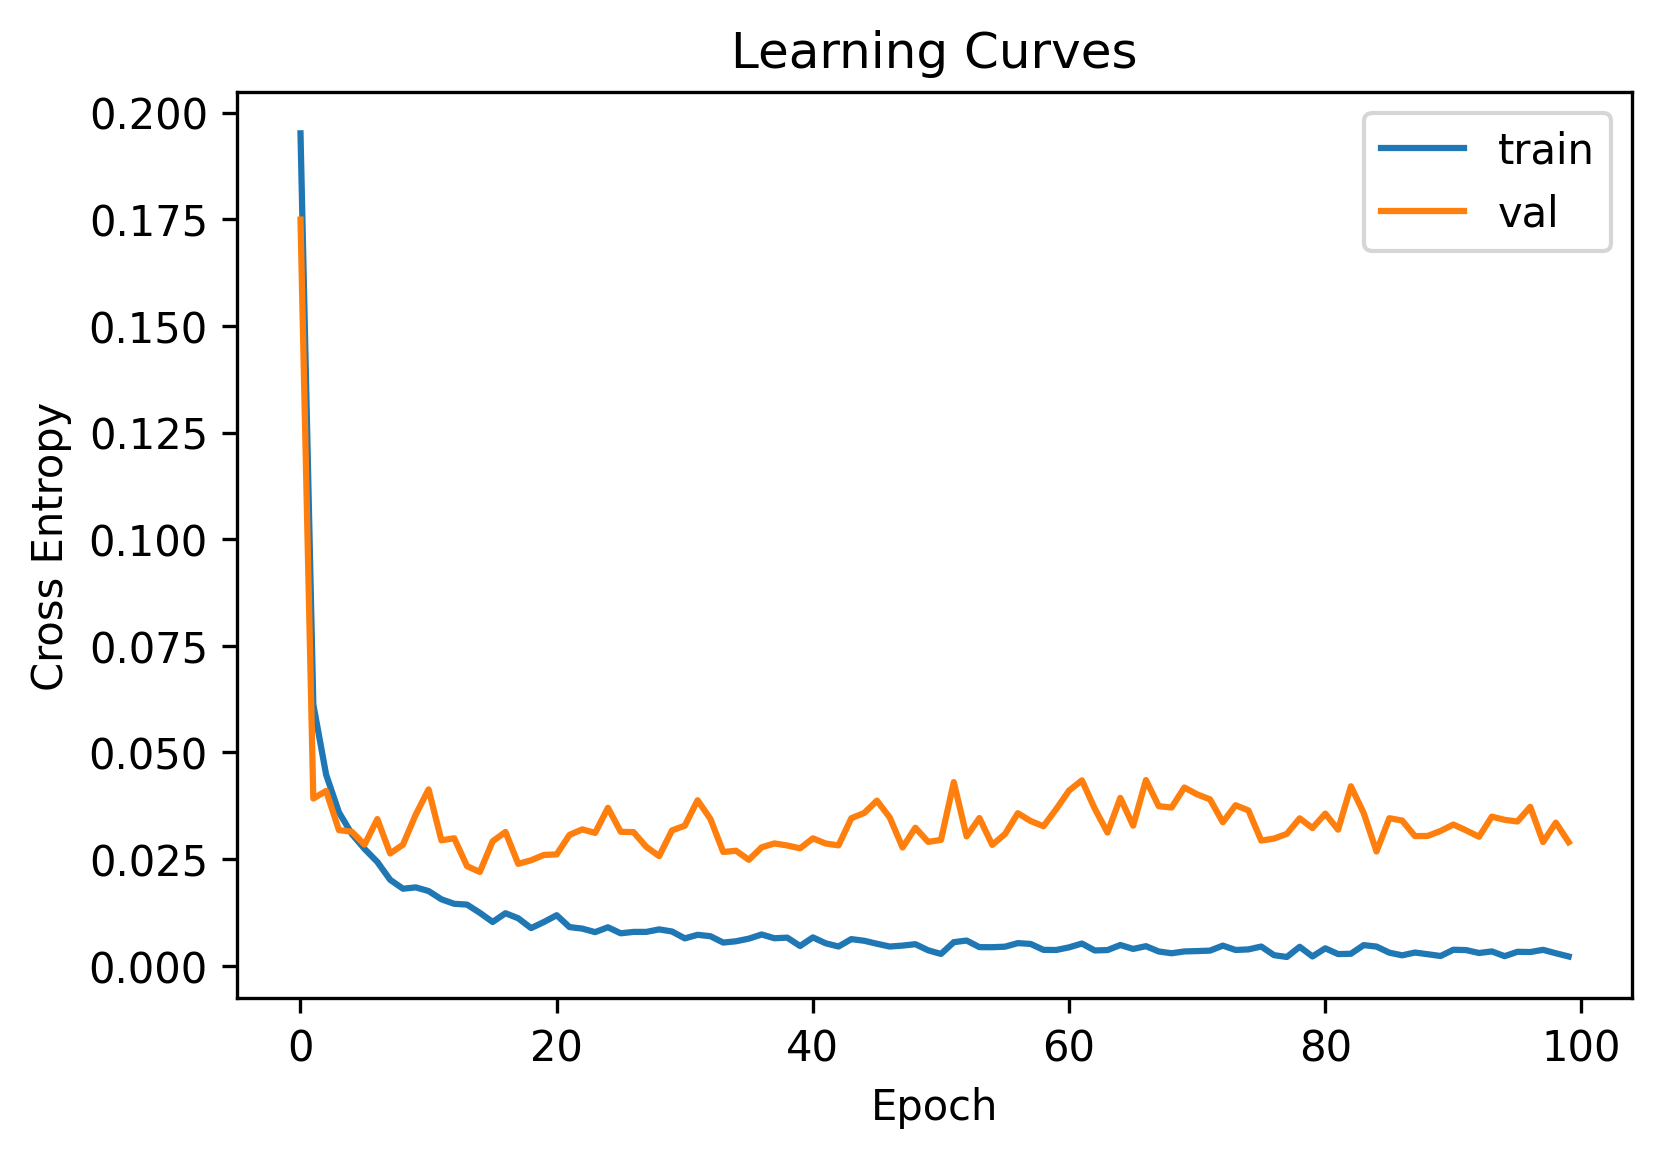

In [ ]:
import matplotlib.pyplot as plt
import random
from keras.utils import to_categorical
from tensorflow import keras


def preprocess_data(x_train, y_train, X_test1, Y_test1, X_test2, Y_test2):
  # reshape images to the the required size by Keras
  x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
  X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], X_test1.shape[2], 1)
  X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], X_test2.shape[2], 1)
  # convert from integers to floats
  x_train = x_train.astype('float32')
  X_test1 = X_test1.astype('float32')
  X_test2 = X_test2.astype('float32')
  # normalize to range 0-1
  x_train = x_train/255.0
  X_test1 = X_test1/255.0
  X_test2 = X_test2/255.0
  # One-hot encoding label
  return x_train, y_train, X_test1, Y_test1, X_test2, Y_test2


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
# metrics
from keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
# optimization method
from keras.optimizers import SGD
from keras import metrics
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
# metrics
from keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
# optimization method
from keras.optimizers import SGD
def LeNet():
  '''
  model = Sequential()
  model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Conv2D(32, (5, 5), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  # compile the model with a loss function, a metric and an optimizer function
  model.compile(loss = categorical_crossentropy,
                optimizer = 'Adam',
                metrics = ['accuracy'])'''
  '''model = Sequential()
  model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Conv2D(30, (5, 5), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation='softmax'))'''
  # compile the model with a loss function, a metric and an optimizer function
  model = Sequential()
  #model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  #model.add(MaxPooling2D())
  #model.add(Dropout(0.2))
  model.add(Conv2D(30, (5, 5),input_shape=(28, 28, 1), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(loss = categorical_crossentropy,
                optimizer = opt,
                metrics = ['accuracy','mse',metrics.Precision(), metrics.Recall()])
  return model

LeNet_model = LeNet()
LeNet_model.summary()


def train_model(model, x_train, y_train, X_test1, Y_test1, X_test2, Y_test2, epochs = 100, batch_size = 128):
  # Rescaling all training and testing data
  x_train, y_train, X_test1, Y_test1, X_test2, Y_test2 = preprocess_data(x_train, y_train, X_test1, Y_test1, X_test2, Y_test2)
  # Fitting the model
  history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = ( X_test1, Y_test1), validation_steps = X_test1.shape[0]//batch_size, verbose = 1)
  scores = model.evaluate(X_test1, Y_test1, verbose=0)
  print(scores)
  print("Test loss: %.4f%%" % (scores[0]))
  print("Large CNN Error: %.4f%%" % (100-scores[1]*100))
  print("Test Accuracy: %.4f%%" % (scores[1]*100))
  print("Test Precision: %.4f%%" % (scores[3]*100))
  print("Test Recall: %.4f%%" % (scores[4]*100))
  F1_Score = (2*scores[3]*scores[4])/(scores[3]+scores[4])
  print("Test F1_Score: %.4f%%" % (F1_Score*100))
  model.save("/content/drive/MyDrive/HCR Project/Own Models/model5.h5")
  #print('%.3f' % (acc * 100.0))
  summary_history(history)

def summary_history(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  #plt.plot(history.history['loss'], color = 'green', label = 'train_loss')
  #plt.plot(history.history['val_loss'], color = 'black', label = 'val_loss')
  plt.legend()
  plt.title('Accuracy')
  plt.savefig('/content/drive/MyDrive/HCR Project/Own Plots/ACCmodel5_100_128.jpg')
  plt.show()
  plt.plot(history.history['accuracy'])
  plt.title('Test accuracy of the proposed CNN Model')
  plt.xlabel('Epochs')
  plt.ylabel('Test accuracy')
  plt.show()
  plt.plot(history.history['mse'])
  plt.title('MSE of the proposed CNN Model')
  plt.xlabel('Epochs')
  plt.ylabel('MSE')
  plt.savefig('/content/drive/MyDrive/HCR Project/Own Plots/MSEmodel5_100_128.jpg')
  plt.show()
  #plot learning curves
  plt.title('Learning Curves')
  plt.xlabel('Epoch')
  plt.ylabel('Cross Entropy')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='val')
  plt.legend()
  plt.savefig('/content/drive/MyDrive/HCR Project/Own Plots/CEmodel5_100_128.jpg')

train_model(LeNet_model, x_train, y_train, X_test1, Y_test1, X_test2, Y_test2)

1/1 [==============================] - 0s 71ms/step
[[5.3092165e-24 4.1745926e-10 3.5752258e-12 3.1381209e-21 1.0000000e+00
  3.3317461e-12 6.4160450e-13 6.6677767e-13 1.1070686e-14 1.4708340e-12]]
4
4
1/1 [==============================] - 0s 12ms/step
[[3.3911155e-11 2.5489956e-11 9.9999976e-01 2.5585575e-07 1.9668541e-11
  4.2593172e-13 1.5436431e-10 1.5060058e-09 1.3226025e-16 2.4433811e-15]]
2
2
1/1 [==============================] - 0s 13ms/step
[[2.0096329e-15 9.4874413e-16 4.2781910e-13 6.2503657e-18 9.9993122e-01
  8.0704757e-12 2.7792261e-08 1.0077359e-14 4.7169354e-14 6.8726877e-05]]
4
4
1/1 [==============================] - 0s 13ms/step
[[3.3269862e-18 5.3633352e-12 8.1358329e-17 4.7785246e-13 4.6947611e-16
  2.0099172e-11 2.2945548e-13 1.5590268e-14 1.0000000e+00 6.8232620e-15]]
8
8
1/1 [==============================] - 0s 13ms/step
[[8.1821036e-15 2.9639313e-08 5.7223559e-11 6.2532255e-14 2.9612133e-08
  4.8651286e-16 2.9403072e-14 1.7886109e-06 4.6730221e-07 9.9999762e

Text(212.16666666666666, 0.5, 'True classes')

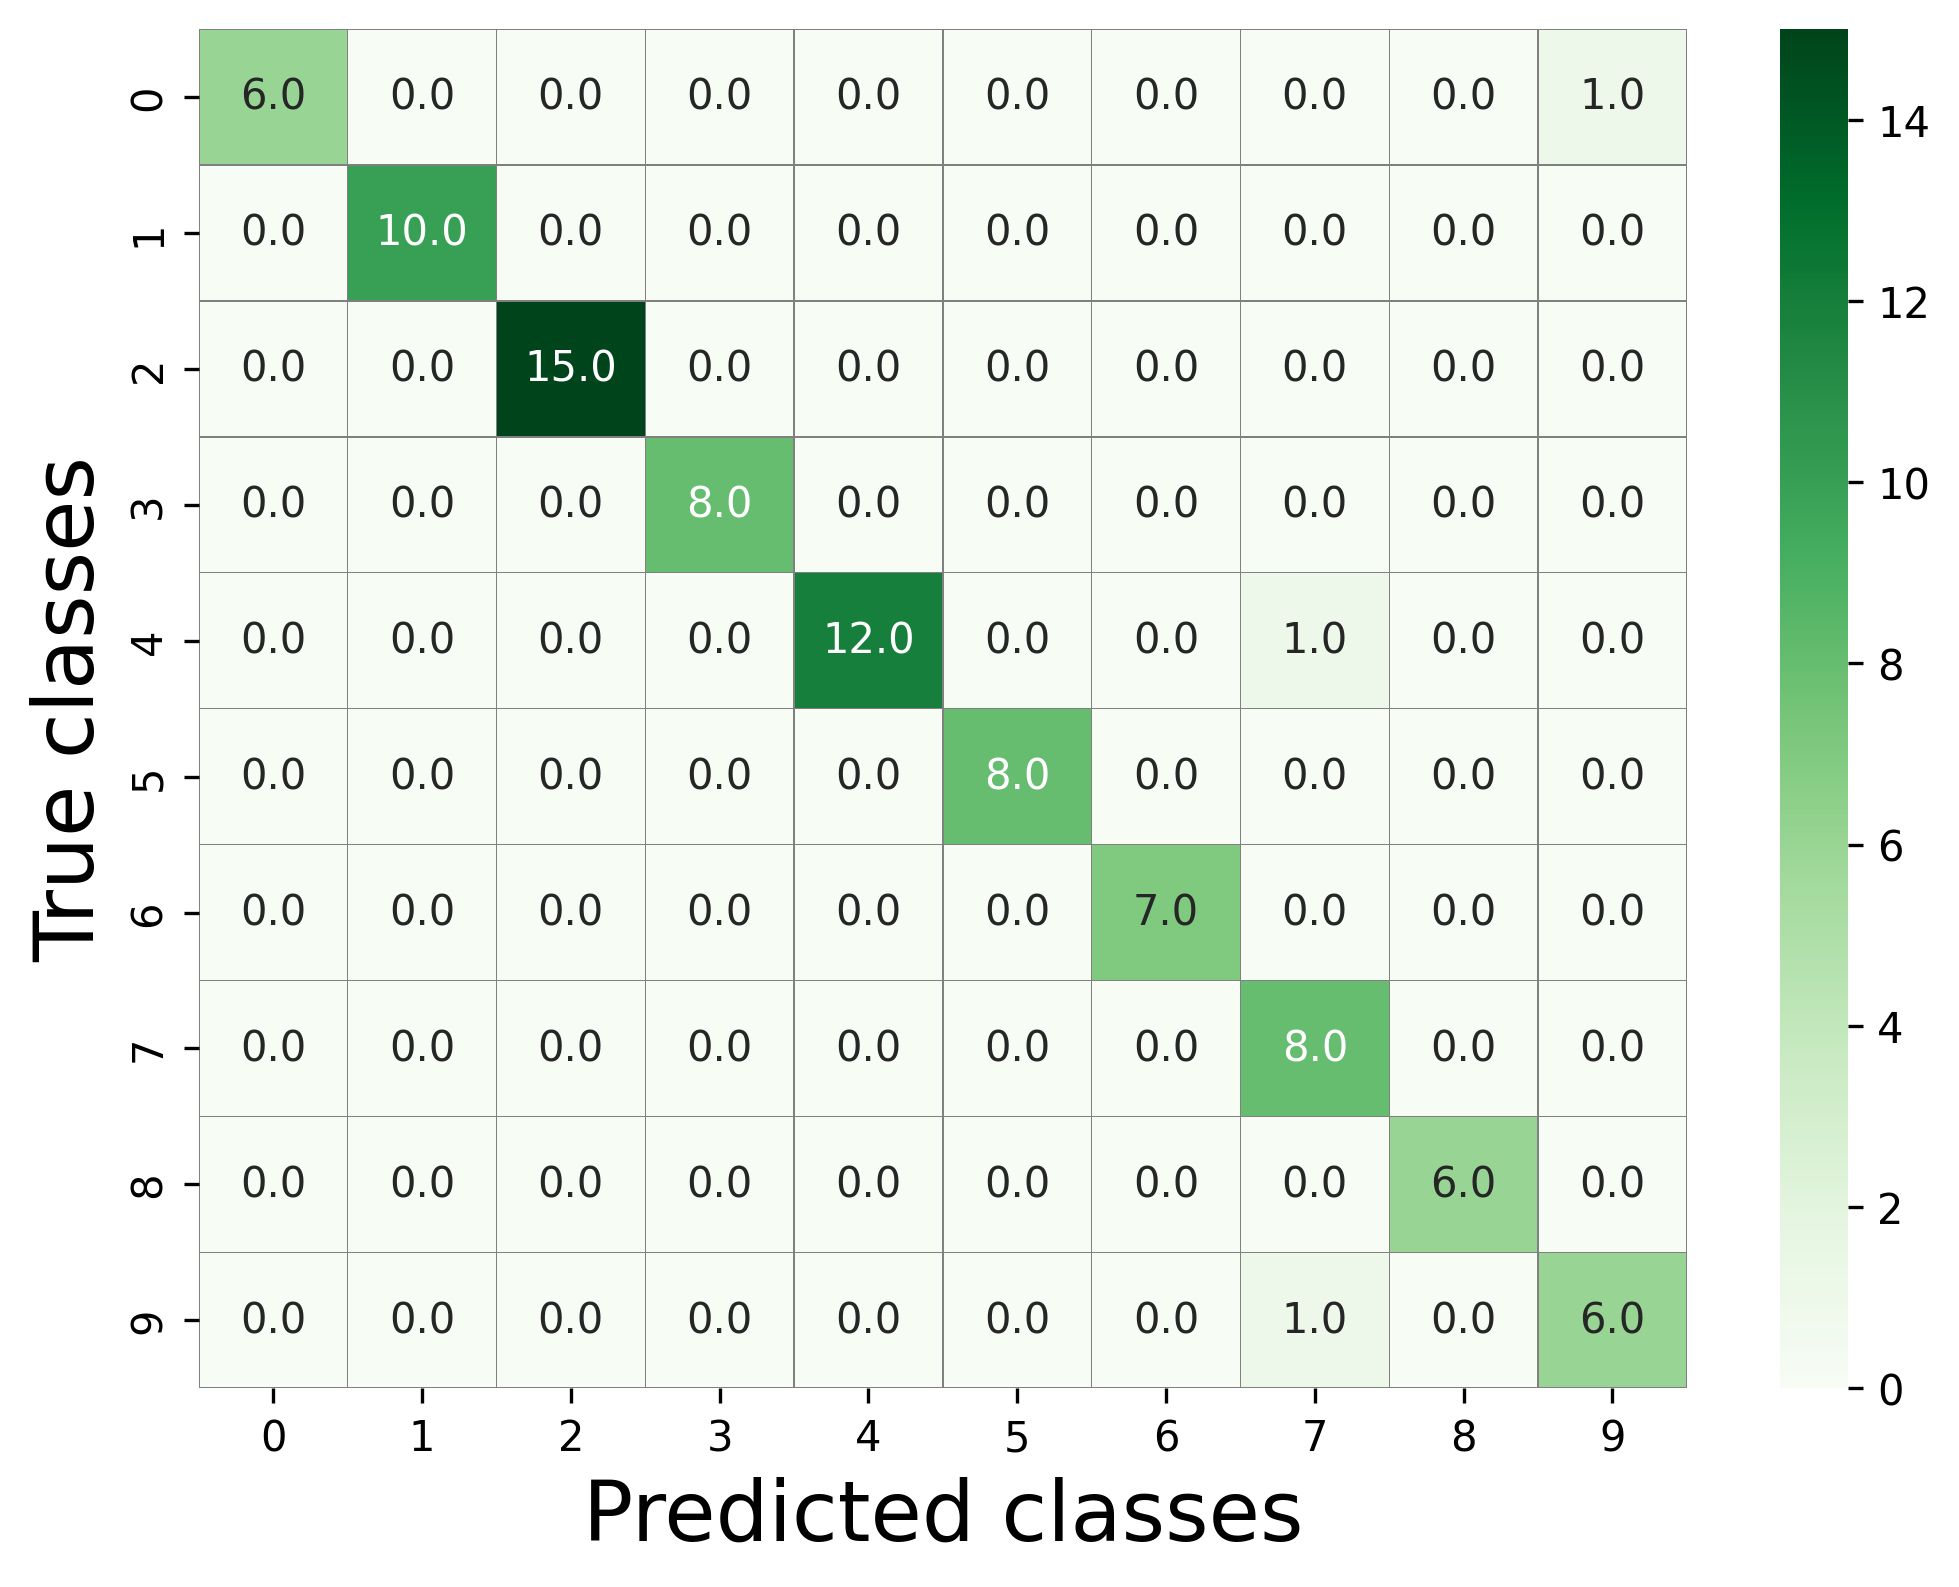

In [ ]:
Y_test2_pred = []
Y_test2_compare=[]
for i in range(len(X_test2)):
  img = X_test2[i]
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  # one-hot vector output
  vec_p = LeNet_model.predict(img)
  print(vec_p)
  # determine the lable corresponding to vec_p
  Y_p = np.argmax(vec_p)
  print(Y_p)
  Y_test2_pred.append(Y_p)
  Y_a = np.argmax(Y_test2[i])
  print(Y_a)
  Y_test2_compare.append(Y_a)

Y_test2_pred = np.asarray(Y_test2_pred)



con_mat = confusion_matrix(Y_test2_compare, Y_test2_pred)

plt.figure(figsize = (8,6))
sns.heatmap(con_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

conf_matrix = confusion_matrix(y_true=Y_test2_compare, y_pred=Y_test2_pred)
print('Accuracy: %.3f' % accuracy_score(Y_test2_compare,Y_test2_pred))


Accuracy: 0.966
